In [87]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# nltk.download('punkt')

In [3]:
url = "https://garuda.kemdikbud.go.id/documents?page={}&q=machine+learning"
mainurl = "https://garuda.kemdikbud.go.id"

df = pd.DataFrame.from_dict({
    'name': [],
    'published_at': [],
    'abstract': [],
    'publisher': [],
    'company_publisher': [],
    'creator': [],
    'category': [],
    'web_publisher': [],
    'link_publisher': [],
    # 'ris_citation': [], 
    # 'bibtex_citation': [], 
    # 'ori_source': [], 
    # 'ori_download': [], 
    # 'scholar': [],
})

for i in range(150):
    uri = f"{url.format(i)}"

    result = requests.get(url=uri).content
    doc = BeautifulSoup(result, "html.parser")
    article = doc.findAll('div', class_="article-item")

    for articles in article:
        articletitle = articles.find('a')
        href = articletitle.get('href')
        link_doc = mainurl + href
        spec = requests.get(url=link_doc).content

        journal = BeautifulSoup(spec, "html.parser")
        journal_name = journal.find('h3', class_="ui header").text
        journal_publish = journal.find('div', class_="four wide column").text
        journal_publish_clear = journal_publish.replace("\n", "")
        journal_abstract = journal.find('div', class_="abstract-article").text

        
        
        segment = journal.find_all("div", class_="ui segment")
        journal_writter_dump = journal.find('div', class_="ui segment article-display")
        journal_writter = journal_writter_dump.find('div')
        if journal_writter:
            middle_div = journal_writter.find('div')
            if middle_div:
                middle_a = middle_div.find('a').text
          
        # journal_writter_fix = journal_writter.find('a').text
        publisher = journal.find("div", class_="ui segment j-art-display")
        name_publisher_meta = publisher.find("div", class_="j-title")
        web_publisher_meta = publisher.find("div", class_="j-website")
        pub_publisher_meta = publisher.find("div", class_="j-pub-name")
        category_publisher_meta = publisher.find("a", class_="ui tag label grey mini")
        name_publisher = name_publisher_meta.find("a").text
        web_publisher = web_publisher_meta.find("a")
        pub_publisher = pub_publisher_meta.find("a").text
        link_pub_publisher = pub_publisher_meta.find("a")

        web_publisher_fix = web_publisher['href']

        for div in segment:
            item_elements = div.find_all("div", class_="item")
            linked = []
            keys = ['ris_citation', 'bibtex_citation', 'ori_source', 'ori_download', 'scholar']
            for a in item_elements:
                anchor = a.find_all("a", class_="content")
                for index, link in enumerate(anchor):
                    href = link['href']
                    # print(href)
                    linked.append(href)
        
        new_list = [{key:value for key in keys} for value in linked]
        new_row = {'name': journal_name.replace("\n", ""),
            'published_at': journal_publish_clear.replace("Article InfoPublish Date", ""),
            'abstract': journal_abstract.replace("\n", ""),
            'publisher': name_publisher.replace("\n", ""),
            'company_publisher': pub_publisher.replace("\n", ""),
            'category': category_publisher_meta,
            'creator': middle_a,
            'web_publisher': web_publisher_fix.replace("\n", ""),
            'link_publisher': mainurl + link_pub_publisher['href'],
            # 'ris_citation': new_list[0]['ris_citation'],
            # 'bibtex_citation': new_list[0]['bibtex_citation'],
            # 'ori_source': new_list[0]['ori_source'],
            # 'ori_download': new_list[3]['ori_download'],
            # 'scholar': new_list[4]['scholar']
        }
        row_new_df = pd.DataFrame([new_row])
        df = pd.concat([df, row_new_df], ignore_index=True)

AttributeError: 'NoneType' object has no attribute 'text'

In [2]:
df.head()

NameError: name 'df' is not defined

In [6]:
df.to_csv('garuda_ml.csv', index=False)

In [8]:
df.to_excel('garuda_ml.xlsx', index=False)

VALUE COUNTS OF PUBLISHER

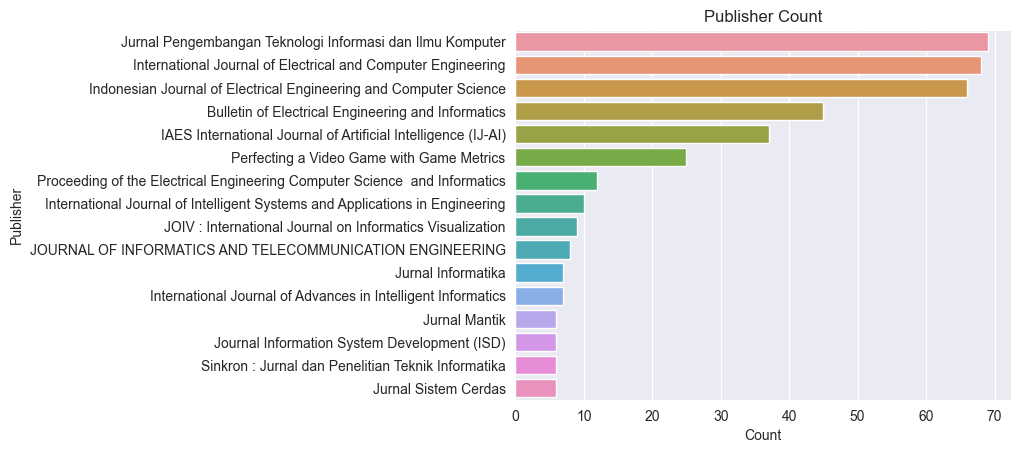

In [3]:
df = pd.read_csv("garuda_ml.csv")

publisher_count = df['publisher'].value_counts()
top_publisher = publisher_count[publisher_count>5]
sns.barplot(x=top_publisher.values, y = top_publisher.index)
plt.xlabel('Count')
plt.ylabel('Publisher')
plt.title('Publisher Count')
plt.show()

VALUES COMPANY PUBLISHER

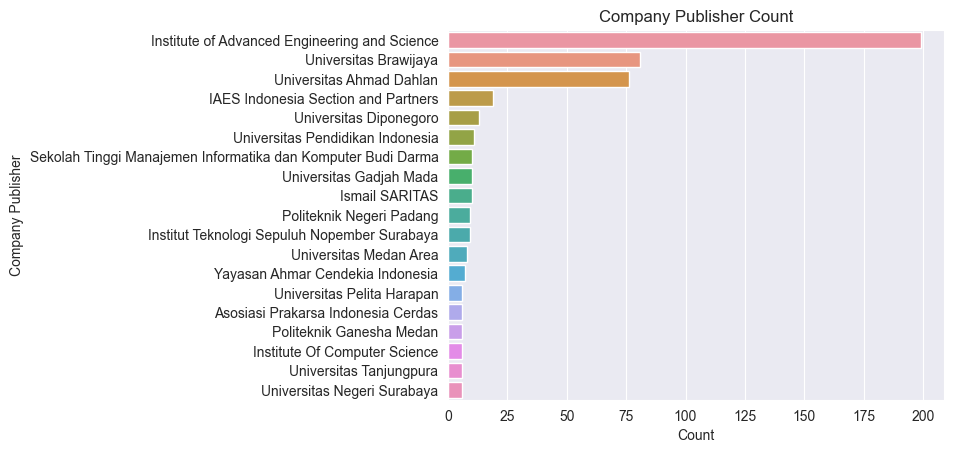

In [4]:
company_publisher_count = df['company_publisher'].value_counts()
top_company_publisher_count = company_publisher_count[company_publisher_count>5]
sns.barplot(x=top_company_publisher_count.values, y = top_company_publisher_count.index)
plt.xlabel('Count')
plt.ylabel('Company Publisher')
plt.title('Company Publisher Count')
plt.show()

ABSTRACT ANALYSIS

In [105]:

text = str(df['abstract'][100])


tokens = word_tokenize(text=text, language="english")
lower_tokens = [word.lower() for word in tokens]
alpha_only = [t for t in lower_tokens if t.isalpha()]
no_stops = [t for t in alpha_only if t not in stopwords.words('english')]
Counter(no_stops).most_common(10)

[('water', 5),
 ('process', 5),
 ('elm', 5),
 ('optimization', 5),
 ('forecasting', 4),
 ('parameters', 4),
 ('using', 3),
 ('seawater', 3),
 ('data', 3),
 ('power', 2)]